# <center><u>Deep Learning for Side-Channel Analysis</u></center>

<center><b>Adrien Chuttarsing & Luca Veyrin-Forrer & Malik Kazi Aoual & Martin Bauw & Nouredine Nour</b></center>

<center> Data Camp Project - M2 AIC </center>

## 1. Challenge introduction

## 2. Business case: embedded encryption, data, IoT

## 3. Exploratory data analysis

## 4. Baseline solution

## 5. Making a RAMP submission

# <center><span style="color:blue">1. Challenge introduction</span></center>

<center><img src="images/sca.jpg" width="500" heights="100"> <b>SCA: breaching a system with only external access to it</b> <br>Image credit: https://www.cs.tau.ac.il/~tromer/acoustic/</center>

This challenge is about revealing the relevance of deep learning in the field of a certain type of cyber attack: the Side-Channel Attack (SCA). SCA harvests Side-Channel Analysis information in order to breach a protected system. This information consists in physical measurements associated with the hardware on which the cryptographic algorithms are implemented. Here, we consider the use of electromagnetic measurements of a smart card as a side-channel to attack an AES implementation. The project was inspired by the work of an ANSSI and CEA team https://github.com/ANSSI-FR/ASCAD formalized in a research article https://eprint.iacr.org/2018/053.pdf 

<center><img src="images/whitecard.jpg" width="200" heights="200"><b>Hardware that generated the data:<br>Atmel ATMega8515 + 24C64 plain white smartcard </b><br> Image credit: http://www.infinityusb.com/</center>

The overall advent of AI doesn't go without impacting cybersecurity, a growing and essential field for any economy in our digitalized world. Ernst and Young reports an expected global cost of US $ 6 trillions for cybersecurity breaches across all sectors by 2021.

<br>
<center><img src="images/eufacts.png" width="600" heights="400"><b>EU Council figures on cybersecurity in 2017</b><br> Image credit: consilium.europa.eu/en/infographics/cyber-security/</center>
<br>
<center><img src="images/eufacts2.png" width="800" heights="400"><b>EU cybersecurity facts sheet 2017</b><br> Image credit: consilium.europa.eu/media/21480/cybersecurityfactsheet.pdf</center>

# <center><span style="color:blue">2. Business case: embedded encryption, data, IoT</span></center>

This challenge focuses on the ability of deep learning to help in the cracking of encryption in small hardware that would typically be embedded in IoT devices. IoT devices are central among the cybersecurity concerns, since the upcoming IoT revolution translates into a massive introduction of connected devices among networks, which is directly associated with a wealth of personal and sensitive data. Connected devices have a history of being targeted by cyber attacks since many of them aren't well protected when one consider the interest of the data if gives access to. According to the EU 2017 cybersecurity facts sheet, there will be tens of billions of connected digital devices in the EU alone by 2020.

<br>
<center><img src="atmega.jpeg" width="400" heights="200"><b>Typical non smart card version of the considered microcontroller</b><br> Image credit: microchipdirect.com </center>


# <center><span style="color:blue">3. Exploratory data analysis</span></center>
## Description of the data
### Requirements


In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### Data loading

In [2]:
in_file = h5py.File('data/ASCAD.h5','r')
# Load profiling traces
X_train = np.array(in_file['Profiling_traces/traces'], dtype=np.int8)
# Load profiling labels
y_train = np.array(in_file['Profiling_traces/labels'])
# Load attacking traces
X_test = np.array(in_file['Attack_traces/traces'], dtype=np.int8)
# Load attacking labels
y_test = np.array(in_file['Attack_traces/labels'])

df_train = pd.DataFrame(X_train)
df_test  = pd.DataFrame(y_train)

### A first glympse

In [3]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,19.988140,19.215220,14.979940,8.371440,0.590740,-7.690040,-16.481780,-25.824800,-35.337040,-43.645820,...,-50.366580,-45.824400,-41.853060,-37.731280,-31.992800,-23.645800,-13.219660,-2.214860,7.235560,13.70676
std,2.756678,2.856043,3.127589,3.253264,3.150778,3.083873,3.083877,3.130045,2.970593,2.475944,...,1.688128,1.560966,1.428786,1.641634,2.285531,3.008622,3.475504,3.363897,2.729106,1.87719
min,10.000000,9.000000,3.000000,-3.000000,-10.000000,-17.000000,-26.000000,-35.000000,-44.000000,-52.000000,...,-56.000000,-51.000000,-47.000000,-43.000000,-38.000000,-32.000000,-22.000000,-13.000000,-1.000000,7.00000
25%,18.000000,17.000000,13.000000,6.000000,-2.000000,-10.000000,-19.000000,-28.000000,-38.000000,-46.000000,...,-52.000000,-47.000000,-43.000000,-39.000000,-34.000000,-26.000000,-16.000000,-5.000000,5.000000,12.00000
50%,20.000000,19.000000,15.000000,8.000000,0.000000,-8.000000,-16.000000,-26.000000,-35.000000,-44.000000,...,-50.000000,-46.000000,-42.000000,-38.000000,-32.000000,-24.000000,-13.000000,-2.000000,7.000000,14.00000
75%,22.000000,21.000000,17.000000,11.000000,3.000000,-5.000000,-14.000000,-23.000000,-33.000000,-42.000000,...,-49.000000,-45.000000,-41.000000,-37.000000,-30.000000,-21.000000,-10.000000,0.000000,9.000000,15.00000
max,30.000000,29.000000,26.000000,20.000000,12.000000,3.000000,-7.000000,-16.000000,-27.000000,-36.000000,...,-45.000000,-41.000000,-37.000000,-32.000000,-25.000000,-15.000000,-3.000000,7.000000,15.000000,20.00000


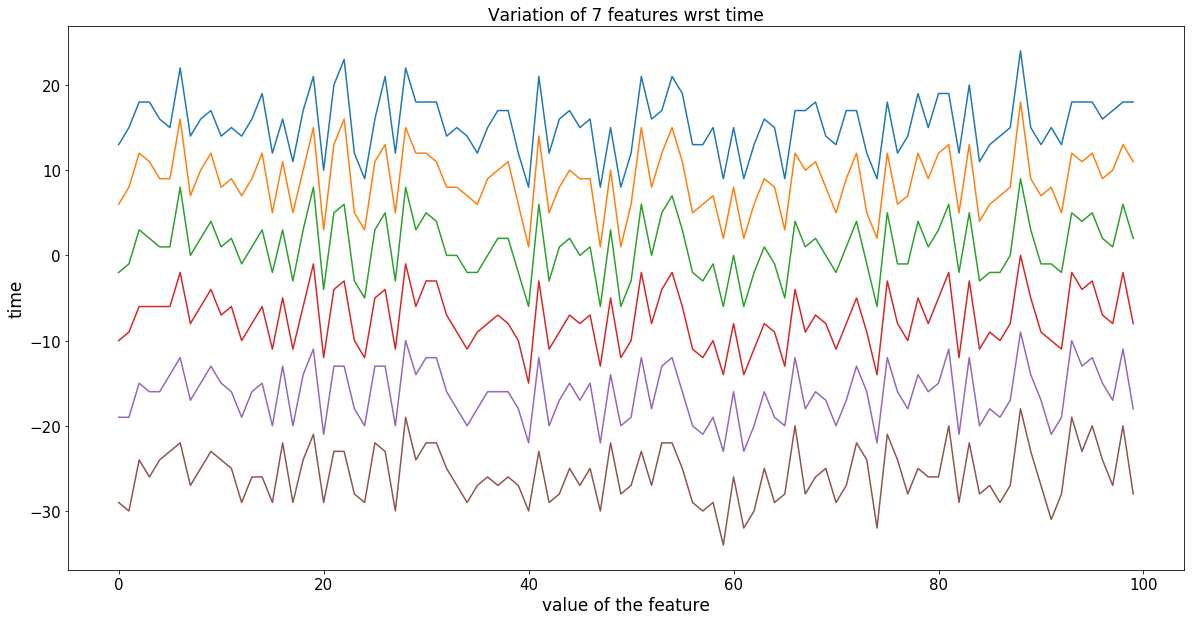

In [4]:
plt.figure(figsize=(20,10))
plt.plot(df_train[:100][2])
plt.plot(df_train[:100][3])
plt.plot(df_train[:100][4])
plt.plot(df_train[:100][5])
plt.plot(df_train[:100][6])
plt.plot(df_train[:100][7])
plt.title("Variation of 7 features wrst time",fontsize=17)
plt.xlabel("value of the feature",fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel("time",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

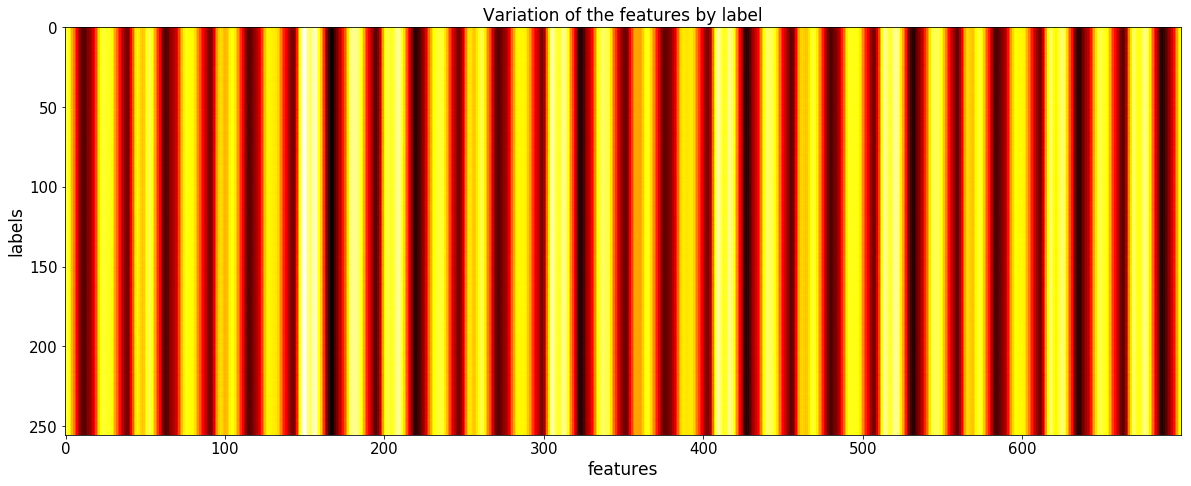

In [5]:
df_train_labelled = df_train.copy()
df_train_labelled[700] = y_train
u = df_train_labelled.groupby([700]).mean()

plt.figure(figsize=(20,10))

plt.imshow(u, cmap='hot', interpolation='nearest')
plt.title("Variation of the features by label",fontsize=17)
plt.xlabel("features",fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel("labels",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

We have 256 balanced labels :

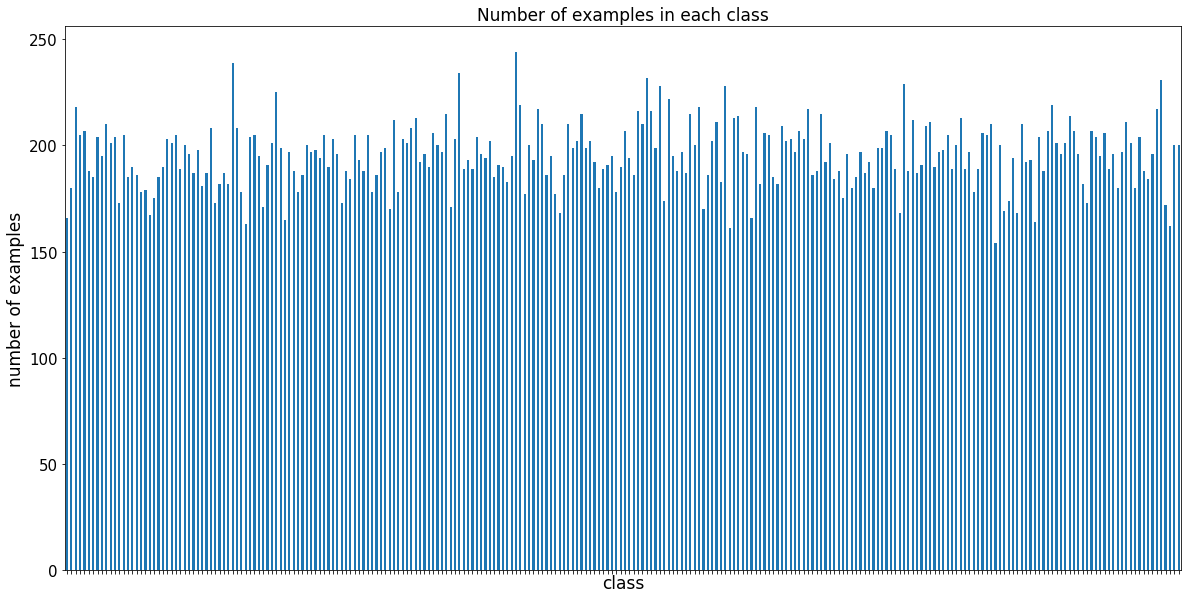

In [32]:
pd.DataFrame(np.unique(y_train, return_counts=True)[1]).plot(kind='bar', figsize=(20,10), legend=False)
plt.title("Number of examples in each class",fontsize=17)
plt.xlabel("class",fontsize=17)
plt.xticks(fontsize=15, visible=False)
plt.ylabel("number of examples",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

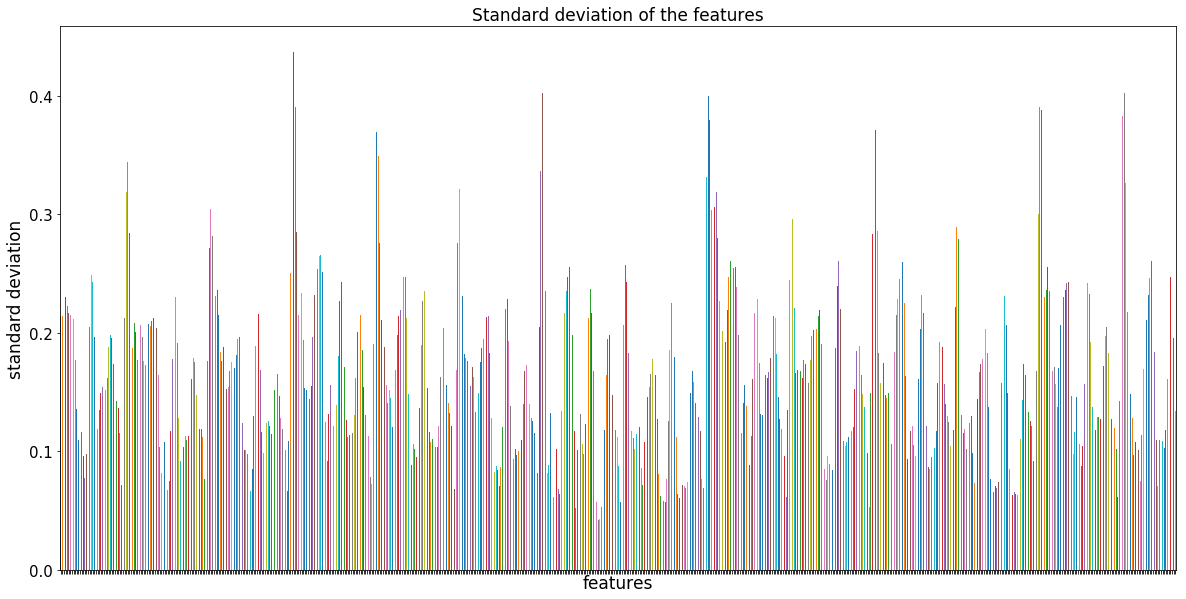

In [33]:
plt.figure(figsize=(20,10))
u.std().plot( kind='bar')
plt.title("Standard deviation of the features",fontsize=17)
plt.xlabel("features",fontsize=17)
plt.xticks(fontsize=15, visible=False)
plt.ylabel("standard deviation",fontsize=17)
plt.yticks(fontsize=15)
plt.show()

### Let's look at it more in details

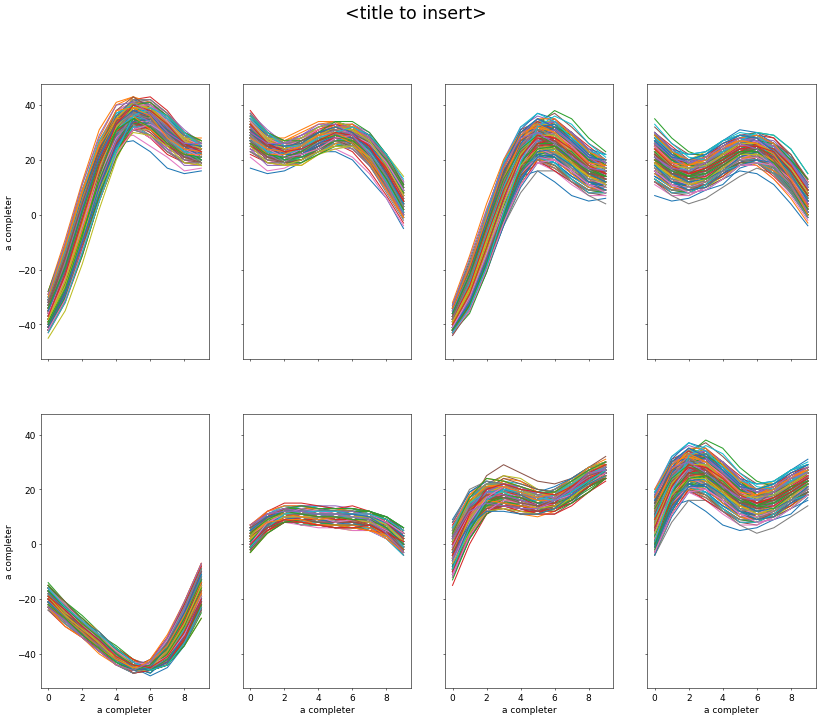

In [8]:
from sklearn.preprocessing import normalize

def plot_minima(minima,X_train,y_train,i,j,axs):
    for k in range(1,256):
            axs[i, j].plot(X_train[np.where(y_train == k)][0][minima-5:minima+5])

X_1 = normalize(X_train[np.where(y_train == 1)])
X_240 = normalize(X_train[np.where(y_train == 240)])

example = X_1[0]

local_max = np.r_[True, example[1:] > example[:-1]] & np.r_[example[:-1] > example[1:], True]
local_min = np.r_[True, example[1:] < example[:-1]] & np.r_[example[:-1] < example[1:], True]

maximum_idx = np.where(local_max == True)
minimas_idx = np.where(local_min == True)

n_sub = 0
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
plt.suptitle("<title to insert>",fontsize=25)
fig.set_size_inches(20,16)
fig.dpi=50

axs.ravel()[n_sub].set_ylabel('a completer', fontsize=13) 
for maximum in maximum_idx[0]:
    if maximum in [149,156,416,409]:
        for i in range(1,256):
            axs.ravel()[n_sub].plot(X_train[np.where(y_train == i)][0][maximum-5:maximum+5])
            axs.ravel()[n_sub].tick_params(labelsize=13)
        n_sub += 1
        
axs.ravel()[n_sub].set_ylabel('a completer', fontsize=13) 
for minimum in minimas_idx[0]:
    if minimum in [90,130,204,412]:
        for i in range(1,256):
            axs.ravel()[n_sub].plot(X_train[np.where(y_train == i)][0][minimum-5:minimum+5])
            axs.ravel()[n_sub].set_xlabel('a completer', fontsize=13)
            axs.ravel()[n_sub].tick_params(labelsize=13)
        n_sub += 1

plt.show()    

We can notice these little differences in the extrema. It could ...

### Score / Metric

<BarContainer object of 256 artists>

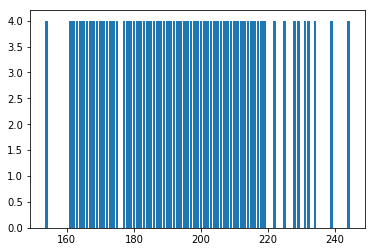